# Data Analytics for Gamified To Do List

In [2]:
import pandas as pd

In [3]:
import os
import pandas as pd
from class_profile import Profile
from file_functions import append_dict_json, read_file, sort_json, load_file
from data_functions import convert_dataframe

In [4]:
joshua = Profile("Joshua", 0, 1)
data = load_file(joshua.name)
df = convert_dataframe(data)

In [5]:
print("Duplicated Rows: ", df.duplicated().sum())

Duplicated Rows:  0


In [6]:
df['status'].value_counts()

status
pending      77
completed    64
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     141 non-null    object
 1   difficulty   141 non-null    int64 
 2   description  141 non-null    object
 3   points       141 non-null    int64 
 4   date         141 non-null    object
 5   status       141 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.7+ KB


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print("Unique Values in Description Column:", len(df['description'].unique()))

Unique Values in Description Column: 40


In [10]:
df['description'].value_counts()

description
journal                        11
refill water                   10
duolingo                        9
program, commit, push           8
type 10                         7
files                           7
isc2                            7
book                            6
first steps                     5
mouse 3                         5
budget                          5
toothbrush                      5
notepad                         4
file of first steps             4
shower                          4
read book                       4
google slides                   3
budget management               3
organize notepads               3
organize files                  3
type 10, mouse 3                3
fold clothes                    3
program                         2
wash dishes                     2
wash bag                        2
haircut                         2
type 10 mouse 3                 1
hannah picture edits            1
cut nails                       1
no

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [12]:
df['status'].unique()

array(['completed', 'pending'], dtype=object)

In [13]:
average_completion_per_date = df.groupby('date')['status'].value_counts()
average_completion_per_date

date        status   
2024-12-06  pending      11
            completed     8
2024-12-07  completed     8
            pending       7
2024-12-08  completed     7
            pending       6
2024-12-09  pending       9
            completed     3
2024-12-10  pending       6
            completed     3
2024-12-11  pending      10
            completed     5
2024-12-12  pending       8
            completed     4
2024-12-13  completed     7
            pending       5
2024-12-14  completed     6
            pending       3
2024-12-15  completed     6
            pending       4
2024-12-16  pending       8
            completed     7
Name: count, dtype: int64

In [14]:
average_points_per_completion_date = df.groupby('status')['points'].sum()
average_points_per_completion_date

status
completed    505
pending      860
Name: points, dtype: int64

In [15]:
test_df = df.groupby('description')['status'].value_counts()
test_df

description                  status   
book                         pending      6
budget                       pending      4
                             completed    1
budget management            pending      3
cut nails                    completed    1
duolingo                     completed    8
                             pending      1
file of first step           pending      1
file of first steps          pending      4
files                        pending      7
first steps                  pending      5
fold clothes                 pending      2
                             completed    1
google slides                pending      3
haircut                      completed    1
                             pending      1
hannah picture edits         completed    1
isc2                         pending      4
                             completed    3
journal                      completed    9
                             pending      2
mouse 3                      complete

In [16]:
df[(df['status'] == 'completed') & (df['date'] == '6/12/2024')].value_counts()

Series([], Name: count, dtype: int64)

# Data Visualization

In [17]:
import matplotlib.pyplot as plt

In [18]:
df

,category,difficulty,description,points,date,status
0,Personal,2,journal,10,2024-12-06,completed
1,Personal,1,type 10,5,2024-12-06,completed
2,Household,2,refill water,10,2024-12-06,completed
3,Household,1,wash dishes,5,2024-12-06,completed
4,Personal,3,program,15,2024-12-06,pending
...,...,...,...,...,...,...
136,Work,2,review,10,2024-12-16,completed
137,Work,2,typescript slide,10,2024-12-16,pending
138,Personal,2,first steps,10,2024-12-16,pending
139,Personal,2,book,10,2024-12-16,pending


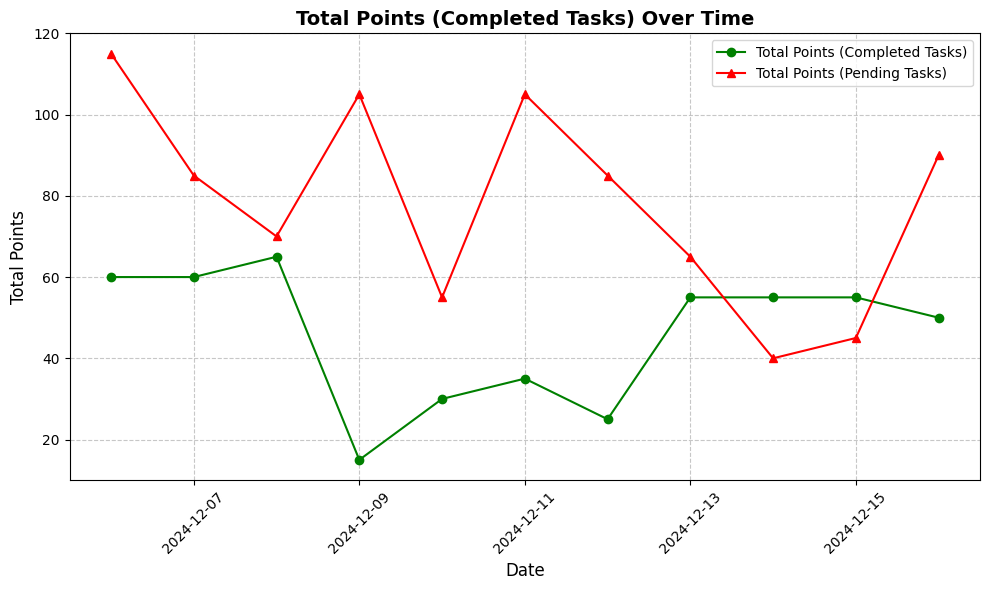

In [32]:
# Convert 'date' to datetime for proper handling
df['date'] = pd.to_datetime(df['date'])

# Filter for completed tasks
completed_tasks = df[df['status'] == 'completed']
pending_tasks = df[df['status'] == 'pending']

# Group by date and sum the points for completed tasks
completed_points_over_time = completed_tasks.groupby('date')['points'].sum()
pending_points_over_time = pending_tasks.groupby('date')['points'].sum()

# Plot the total points over time for completed tasks
plt.figure(figsize=(10, 6))
plt.plot(completed_points_over_time.index, completed_points_over_time.values, marker='o', linestyle='-', color='g', label='Total Points (Completed Tasks)')
plt.plot(pending_points_over_time.index, pending_points_over_time.values, marker='^', linestyle='-', color='r', label='Total Points (Pending Tasks)')

# Add a title and labels
plt.title("Total Points (Completed Tasks) Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Points", fontsize=12)

# Customize the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the line graph
plt.show()

In [20]:
test_df = df.groupby('category')['difficulty'].value_counts().sum()
test_df

np.int64(141)

In [21]:
difficulty_counts = pd.DataFrame()
difficulty_counts = df['difficulty'].value_counts()
difficulty_counts


difficulty
2    68
1    41
3    32
Name: count, dtype: int64

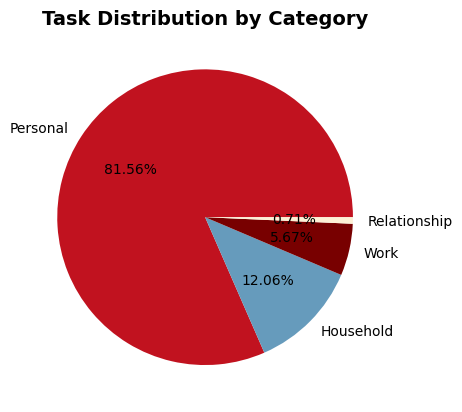

In [22]:
# Count the number of tasks for each category
category_counts = df['category'].value_counts()

# Create the pie chart for categories
plt.pie(category_counts, labels=category_counts.index, autopct="%.2f%%", colors=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"], textprops={'color':'black'})

# Adding a title
plt.title("Task Distribution by Category", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

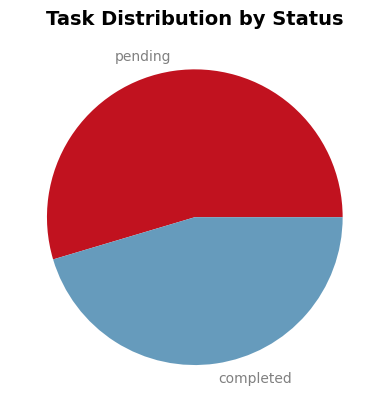

In [23]:
# Count the number of tasks for each status
status_counts = df['status'].value_counts()

# Create the pie chart for task status
plt.pie(status_counts, labels=status_counts.index, colors=["#c1121f", "#669bbc"], textprops={'color':'gray'})

# Adding a title
plt.title("Task Distribution by Status", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

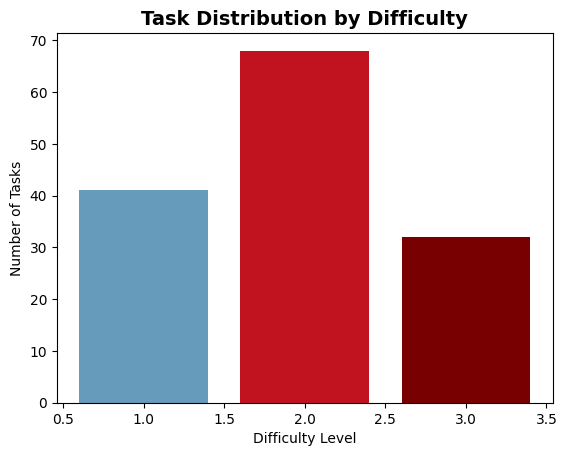

In [24]:
# Count the number of tasks for each difficulty level
difficulty_counts = df['difficulty'].value_counts()

# Create a bar graph for difficulty
plt.bar(difficulty_counts.index, difficulty_counts.values, color=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"])

# Adding a title and labels
plt.title("Task Distribution by Difficulty", fontsize=14, fontweight="bold")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()

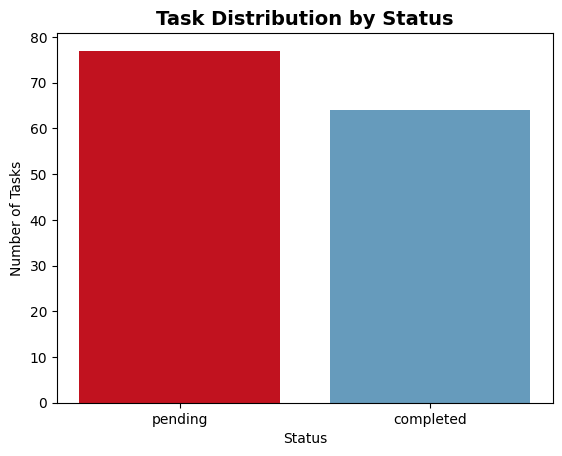

In [25]:
# Count the number of tasks for each status
status_counts = df['status'].value_counts()

# Create a bar graph for task status
plt.bar(status_counts.index, status_counts.values, color=["#c1121f", "#669bbc"])

# Adding a title and labels
plt.title("Task Distribution by Status", fontsize=14, fontweight="bold")
plt.xlabel("Status")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()

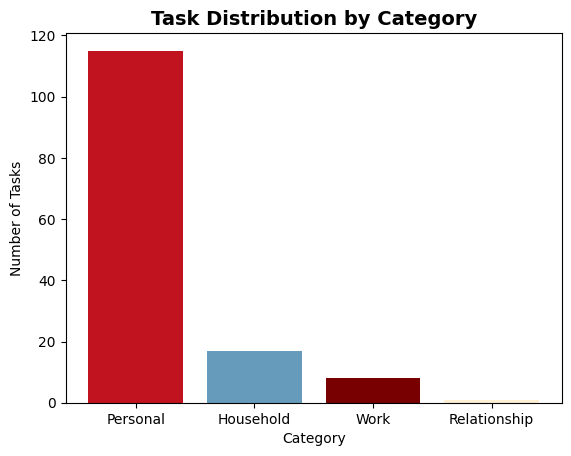

In [26]:
# Count the number of tasks for each category
category_counts = df['category'].value_counts()

# Create a bar graph for categories
plt.bar(category_counts.index, category_counts.values, color=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"])

# Adding a title and labels
plt.title("Task Distribution by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()